In [ ]:
主成分分析

In [16]:
# データを読み込む
import pandas as pd

path = "https://www.iwanami.co.jp/files/moreinfo/0298960/sakubun3f.csv"

d1 = pd.read_csv(path, encoding='shift-jis')
# d1 を実行すると読み込んだデータがすべて表示される。
# データd1のヘットの部分を表示
d1.head()


,Unnamed: 0,人,友達,車,自分,事故,人間,食,文化,寿司,...,クラス,外国,男性,交通,家,親友,味,母,相手,OTHERS
0,akke2,8,20,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60
1,akke5,0,0,3,2,3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,34
2,akke9,2,0,0,1,0,0,3,0,0,...,0,6,0,0,1,0,0,0,0,33
3,ataka2,11,13,0,2,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,41
4,ataka5,4,0,6,2,10,1,0,0,0,...,0,0,0,3,0,0,0,0,0,49


In [18]:
# 相関係数行列を求める
cor1 = d1.select_dtypes(include='number').corr()
cor1.head(2)


,人,友達,車,自分,事故,人間,食,文化,寿司,日本人,...,クラス,外国,男性,交通,家,親友,味,母,相手,OTHERS
人,1.000000,0.668792,-0.206772,0.316273,-0.040689,-0.185223,-0.340958,-0.298266,-0.176753,-0.359361,...,0.242102,-0.152314,-0.000496,-0.201610,-0.271399,0.535217,-0.272867,-0.16696,0.286423,-0.304857
友達,0.668792,1.000000,-0.293388,0.395483,-0.233354,-0.142334,-0.324051,-0.237202,-0.084085,-0.320229,...,0.216818,-0.184079,-0.039741,-0.256426,-0.171735,0.514023,-0.273699,-0.10159,0.344738,-0.224875


In [19]:
# 固有値分解を行う
import numpy as np

w1, v1 = np.linalg.eig(cor1)


In [23]:
n = len(w1)

df = pd.DataFrame({
    '主成分': ['comp'+str(i) for i in range(1, n+1)],
    '固有値': w1,
    '寄与率(%)': w1/np.sum(w1)*100,
    '累積寄与率(%)': np.cumsum(w1/np.sum(w1))*100
})

df[:11]



32

In [24]:
# 読み込んだデータと同じの大きさの乱数データを作成し、その固有値を求める
random = np.random.normal(0,1,(n,n))
cor2 = pd.DataFrame(random).corr(method='pearson')
        
w2, v2 = np.linalg.eig(cor2)


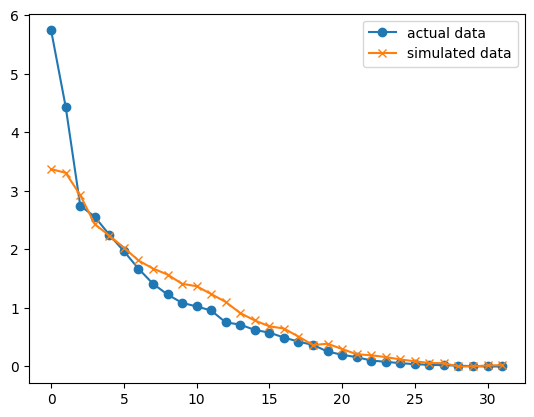

In [25]:
# 乱数データと比較し、意味がある固有値はいくつまでであるかを確認する。
import matplotlib.pyplot as plt

plt.plot(w1, '-o', label='actual data');
plt.plot(w2, '-x', label='simulated data');
plt.legend();


In [26]:
huka = v1.T*(np.sqrt(w1).reshape(-1,1))
x1 = d1.iloc[:, 1:-1]

a1 = cor1@huka[:2].T


C:\Users\mzjin\AppData\Local\Temp\ipykernel_1256\2933483938.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [axes[1].text(x=a1[0][i], y=a1[1][i], s=d1['Unnamed: 0'][i], c='red', ha='right', va='center') for i in range(len(cor1))];


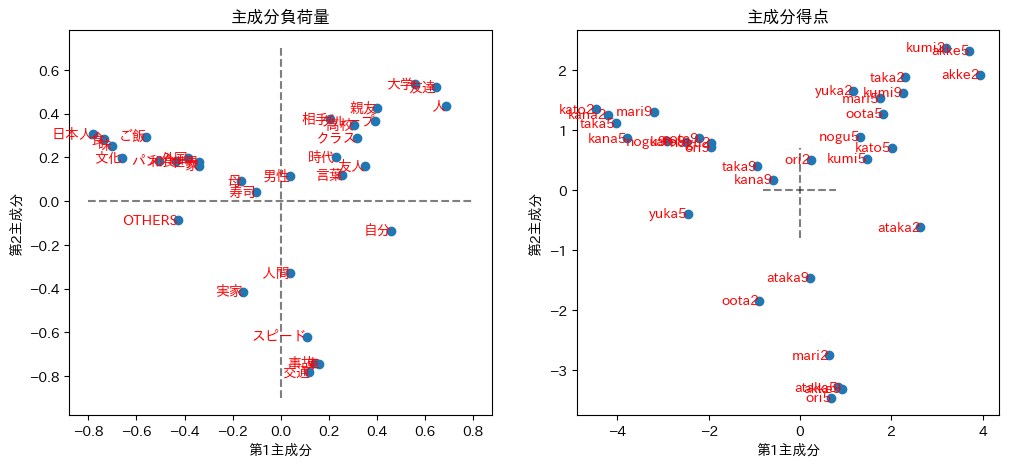

In [29]:
# pip install japanize-matplotlib
import japanize_matplotlib

fig ,axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].scatter(huka[0], huka[1]);
[axes[0].text(x=huka[0][i], y=huka[1][i], s=d1.columns[i+1], c='red', ha='right', va='center') for i in range(len(cor1))];
axes[0].set_title('主成分負荷量');
axes[0].hlines(0, -0.8, 0.8, linestyles='--', color='black', alpha=.5)
axes[0].vlines(0, -0.9, 0.7, linestyles='--', color='black', alpha=.5)
axes[0].set_xlabel('第1主成分');
axes[0].set_ylabel('第2主成分');

axes[1].scatter(a1[0], a1[1]);
[axes[1].text(x=a1[0][i], y=a1[1][i], s=d1['Unnamed: 0'][i], c='red', ha='right', va='center') for i in range(len(cor1))];
axes[1].hlines(0, -0.8, 0.8, linestyles='--', color='black', alpha=.5)
axes[1].vlines(0, -.8, 0.7, linestyles='--', color='black', alpha=.5)
axes[1].set_title('主成分得点');
axes[1].set_xlabel('第1主成分');
axes[1].set_ylabel('第2主成分');


C:\Users\mzjin\AppData\Local\Temp\ipykernel_1256\1943130316.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[1].text(a1[0][i], a1[1][i], d1['Unnamed: 0'][i], c='red')


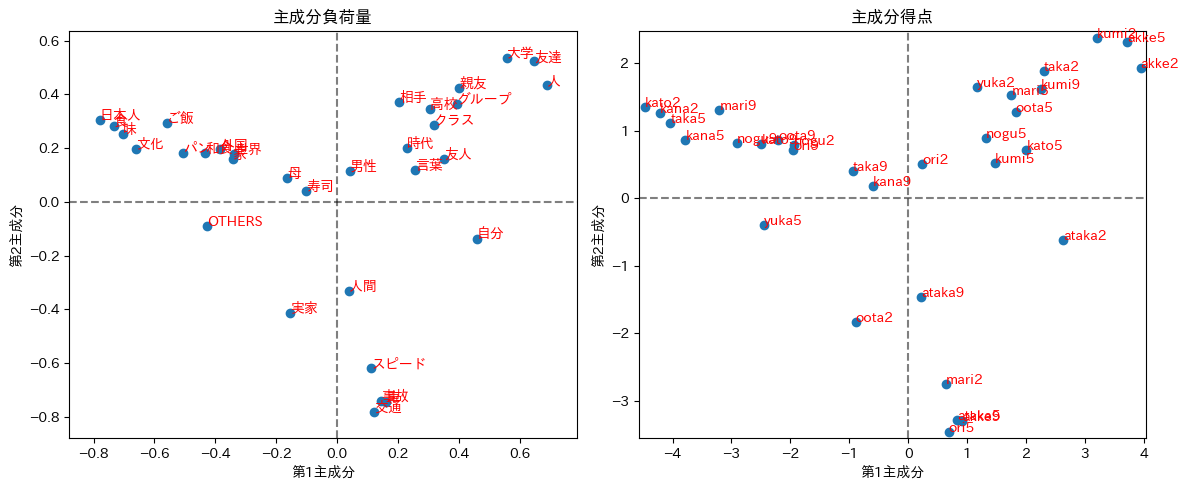

In [32]:
import matplotlib.pyplot as plt
import japanize_matplotlib

# 軸範囲を自動で取得
hx_min, hx_max = huka[0].min()-0.1, huka[0].max()+0.1
hy_min, hy_max = huka[1].min()-0.1, huka[1].max()+0.1

ax_min, ax_max = a1[0].min()-0.1, a1[0].max()+0.1
ay_min, ay_max = a1[1].min()-0.1, a1[1].max()+0.1

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- 主成分負荷量 ---
axes[0].scatter(huka[0], huka[1])
for i in range(len(cor1)):
    axes[0].text(huka[0][i], huka[1][i], d1.columns[i+1], c='red')

axes[0].axhline(0, ls='--', c='black', alpha=.5)
axes[0].axvline(0, ls='--', c='black', alpha=.5)
axes[0].set_xlim(hx_min, hx_max)
axes[0].set_ylim(hy_min, hy_max)
axes[0].set_title('主成分負荷量')
axes[0].set_xlabel('第1主成分')
axes[0].set_ylabel('第2主成分')

# --- 主成分得点 ---
axes[1].scatter(a1[0], a1[1])
for i in range(len(cor1)):
    axes[1].text(a1[0][i], a1[1][i], d1['Unnamed: 0'][i], c='red')

axes[1].axhline(0, ls='--', c='black', alpha=.5)
axes[1].axvline(0, ls='--', c='black', alpha=.5)
axes[1].set_xlim(ax_min, ax_max)
axes[1].set_ylim(ay_min, ay_max)
axes[1].set_title('主成分得点')
axes[1].set_xlabel('第1主成分')
axes[1].set_ylabel('第2主成分')

plt.tight_layout()
plt.show()

C:\Users\mzjin\AppData\Local\Temp\ipykernel_1256\692739542.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [plt.text(x=a1[0][i], y=a1[1][i], s=d1['Unnamed: 0'][i], c='green', ha='right', va='center') for i in range(len(cor1))];


(-30.0, 30.0)

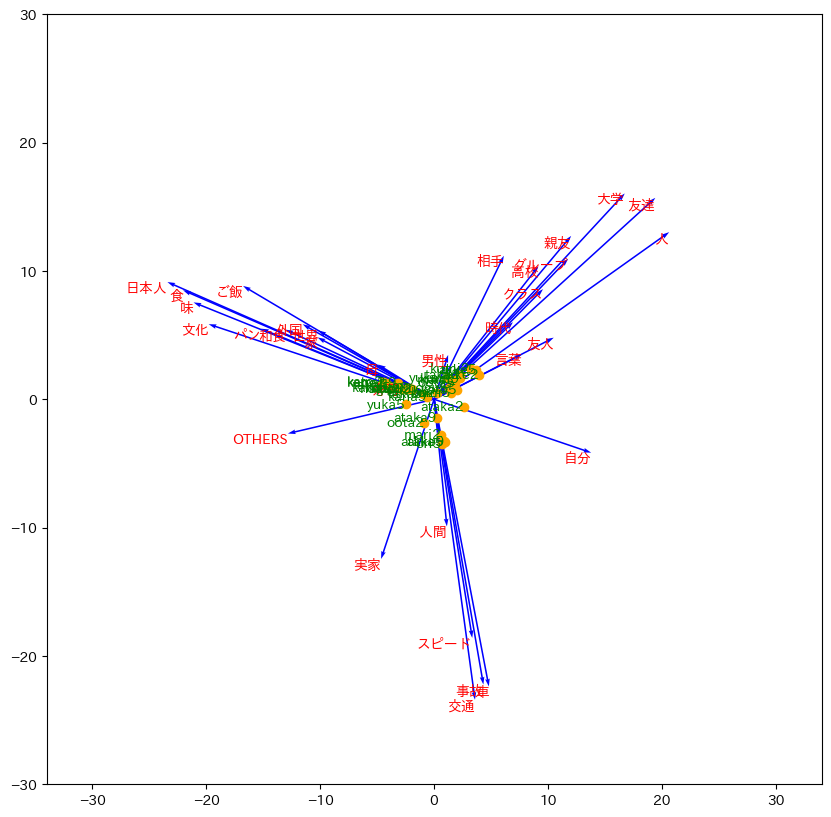

In [33]:
plt.figure(figsize=(10,10))

huka30 = huka*30

plt.quiver(np.zeros(len(huka30)), np.zeros(len(huka30)), huka30[0], huka30[1], angles='xy', scale_units='xy', scale=1, width=0.002, color='blue') # 矢印プロット
[plt.text(x=huka30[0][i], y=huka30[1][i], s=d1.columns[i+1], c='red', ha='right', va='top') for i in range(len(cor1))];

plt.scatter(a1[0], a1[1], color='orange');
[plt.text(x=a1[0][i], y=a1[1][i], s=d1['Unnamed: 0'][i], c='green', ha='right', va='center') for i in range(len(cor1))];

plt.xlim(-34,34)
plt.ylim(-30,30)


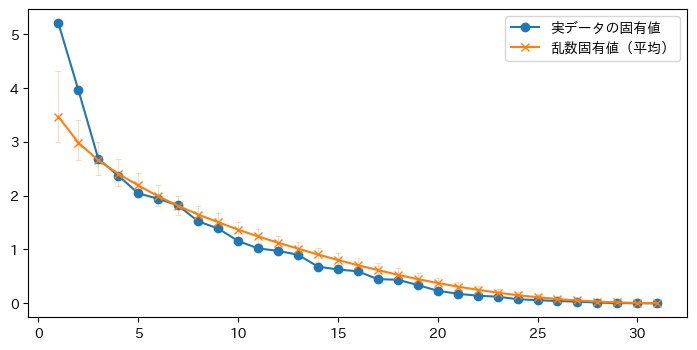

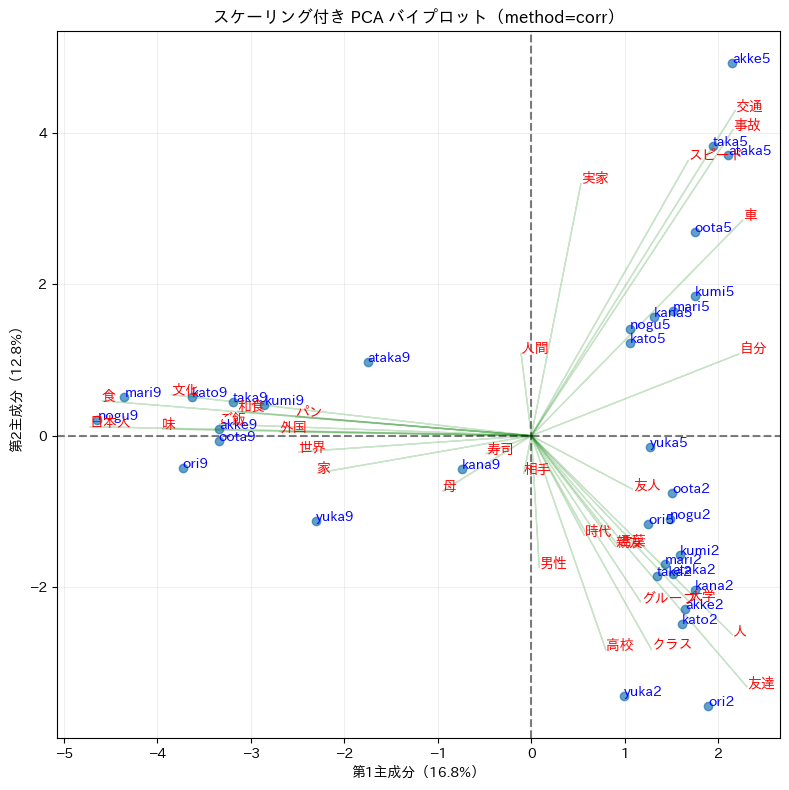

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.preprocessing import StandardScaler

# --- データ読み込み ---
path = "https://www.iwanami.co.jp/files/moreinfo/0298960/sakubun3f.csv"
d1 = pd.read_csv(path, encoding="shift-jis")

# --- 数値データ部分を抽出 ---
X = d1.iloc[:, 1:-1]

# --- 行単位の相対頻度 ---
X_rel = X.div(X.sum(axis=1), axis=0)

# --- 分散0の列を除外（相関PCA/相関平行分析のために必須） ---
col_std = X_rel.std(axis=0, ddof=0)
nonzero_cols = col_std > 0
X_rel = X_rel.loc[:, nonzero_cols]
X = X.loc[:, nonzero_cols]  # biplotの変数名を揃えるため

# ============================================================
# PCA（相関 / 共分散）: 1つの関数に統一（安定な eigh を使用）
# ============================================================
def pca_eigs_and_scores(X_rel, method="corr"):
    """
    method="corr": 標準化 → 相関行列 → 固有分解
    method="cov" : 平均中心化 → 共分散行列 → 固有分解
    """
    if method == "corr":
        Z = StandardScaler().fit_transform(X_rel)
        mat = np.corrcoef(Z, rowvar=False)
        data_for_scores = Z
    elif method == "cov":
        Xc = X_rel - X_rel.mean(axis=0)
        mat = np.cov(Xc.T, bias=False)
        data_for_scores = Xc
    else:
        raise ValueError("method must be 'corr' or 'cov'")

    # 対称行列なので eigh が安定
    w, v = np.linalg.eigh(mat)
    idx = np.argsort(w)[::-1]
    w = w[idx]
    v = v[:, idx]

    scores = data_for_scores @ v[:, :2]
    loadings = v[:, :2] * np.sqrt(w[:2])

    return np.asarray(scores), np.asarray(loadings), w

# ============================================================
# 平行分析（permutation）: 乱数固有値の平均と95%区間（2.5%〜97.5%）
# ============================================================
def parallel_analysis_permutation(X_rel, method="corr", n_iter=500, seed=0):
    rng = np.random.default_rng(seed)
    m, n = X_rel.shape

    # 実データ固有値（PCAと同じmethod）
    _, _, w_real = pca_eigs_and_scores(X_rel, method=method)

    # 乱数固有値（n_iter × n）
    w_rand = np.zeros((n_iter, n))
    Xv = X_rel.to_numpy()

    for t in range(n_iter):
        # 列ごとに permutation（列分布を保持）
        R = np.empty_like(Xv)
        for j in range(n):
            R[:, j] = rng.permutation(Xv[:, j])

        # PCA種類に合わせて行列を作る
        if method == "corr":
            Z = StandardScaler().fit_transform(R)
            mat = np.corrcoef(Z, rowvar=False)
        else:  # "cov"
            Rc = R - R.mean(axis=0)
            mat = np.cov(Rc.T, bias=False)

        w, _ = np.linalg.eigh(mat)
        w_rand[t, :] = np.sort(w)[::-1]

    w_mean = w_rand.mean(axis=0)
    w_lo = np.quantile(w_rand, 0.025, axis=0)   # 95%区間 下端
    w_hi = np.quantile(w_rand, 0.975, axis=0)   # 95%区間 上端

    return w_real, w_mean, w_lo, w_hi

# ============================================================
# ここを切り替えるだけで、PCAと平行分析が常に一致
# ============================================================
method = "corr"   # "corr" か "cov" を選ぶ

# --- PCA 実行 ---
scores, loadings, w1 = pca_eigs_and_scores(X_rel, method=method)

# --- 平行分析（乱数） ---
w_real, w_rand_mean, w_lo, w_hi = parallel_analysis_permutation(
    X_rel, method=method, n_iter=500, seed=0
)



# ============================================================
# 固有値比較プロット：乱数は「折れ線1本（平均）」＋「95%区間エラーバー」
# ============================================================
k = np.arange(1, len(w_real) + 1)

plt.figure(figsize=(8.5, 4))

# 実データ
plt.plot(k, w_real, "-o", label="実データの固有値", zorder=3)

# 乱数平均線（オレンジ）
line_rand, = plt.plot(
    k, w_rand_mean, "-x",
    label="乱数固有値（平均）",
    zorder=3
)

# 乱数95%区間（同じオレンジ・最前面）
yerr = np.vstack([w_rand_mean - w_lo, w_hi - w_rand_mean])
plt.errorbar(
    k, w_rand_mean,
    yerr=yerr,
    fmt="none",
    ecolor=line_rand.get_color(),
    elinewidth=0.5,
    capsize=2,
    capthick=0.5,
    alpha=0.4
)
plt.legend() 
# ============================================================
# biplot
# ============================================================
scale_factor = np.mean(np.std(scores, axis=0)) / np.mean(np.std(loadings, axis=0))
loadings_scaled = loadings * scale_factor

# --- 寄与率（％） ---
contrib = w1 / w1.sum() * 100
pc1_rate = contrib[0]
pc2_rate = contrib[1]


plt.figure(figsize=(8, 8))

# --- 得点 ---
plt.scatter(scores[:, 0], scores[:, 1], alpha=0.7)
for i, label in enumerate(d1["Unnamed: 0"]):
    plt.text(scores[i, 0], scores[i, 1], label, c="blue")

# --- 負荷量（細い矢印） ---
for i, label in enumerate(X.columns):
    plt.arrow(
        0, 0,
        loadings_scaled[i, 0],
        loadings_scaled[i, 1],
        color="green",
        alpha=0.2,
        head_width=0.0005 
    )
    plt.text(loadings_scaled[i, 0], loadings_scaled[i, 1], label, c="red")

plt.axhline(0, ls="--", c="black", alpha=0.5)
plt.axvline(0, ls="--", c="black", alpha=0.5)
plt.xlabel(f"第1主成分（{pc1_rate:.1f}%）")
plt.ylabel(f"第2主成分（{pc2_rate:.1f}%）")
plt.title(f"スケーリング付き PCA バイプロット（method={method}）")
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()
